# Construction of a Non-Unitary Operator
## Linear Combination of Unitaries
by <a href="https://www.linkedin.com/in/la-wun-nannda-b047681b5/">`La Wun Nannda`</a>

## Problem
Apply the non-unitary matrix
\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix}
on a 1-qubit quantum state which has a 0.3 probability being measured in the zero state $|0\rangle$.

## Solution
## 1. Initial Qubit States
According to the problem, we need to create a non-unitary matrix:
$\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix}$. Let's call that matrix $A$.

Given $P(0)=0.3$, we know $P(1)=0.7$. 
- Our `initial state of the target qubit` or `psi` will be $|\psi\rangle=\sqrt{0.3}|0\rangle+\sqrt{0.7}|1\rangle$.
- The `control qubit` is initiated as $|0\rangle$.


## 2. Obtain the Unitaries and Coefficients
We know that a non-unitary matrix $A$ can be constructed by summing the unitary matrices with their respective coefficients (alpha values).

$$A = \sum_{i} \alpha_iU_i$$

$$I + Z =
\begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}
+
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}=
\begin{pmatrix}
2 & 0\\
0 & 0
\end{pmatrix}$$

$$\frac{1}{2}(I + Z)=
\frac{1}{2} \cdot
\begin{pmatrix}
2 & 0\\
0 & 0
\end{pmatrix}=
\begin{pmatrix}
2/2 & 0\\
0 & 0
\end{pmatrix}=
\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix}=A$$

By using the equation $A = \alpha_0I + \alpha_1Z$, we know $\alpha_0=\alpha_1=\frac{1}{2}$. So our equation is-

$$A = \frac{1}{2}I + \frac{1}{2}Z$$


## 3. Updated Qubit States
Since both coefficients for two unitaries have the same value, they have the <b>same</b> `controller probability`.
- The `control qubit` is $\sqrt{0.5}|0\rangle+\sqrt{0.5}|1\rangle$ before the <b>PREPARE'</b> part.
- Recall that the `psi` is $|\psi\rangle=\sqrt{0.3}|0\rangle+\sqrt{0.7}|1\rangle$.


## 4. Estimate Final Outcome
When we apply $A$ on our qubit $|\psi\rangle$, we get $|\psi'\rangle$. 

$$|\psi'\rangle=\frac{1}{\lambda}A|\psi\rangle$$

$\frac{1}{\lambda}$ is called the normalization factor and we will not consider that here to reduce complexity. Therefore, 

$$|\psi'\rangle=
A|\psi\rangle= 
\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix}
\times
\begin{pmatrix}
0.3\\
0.7
\end{pmatrix}=
\begin{pmatrix}
0.3\\
0
\end{pmatrix}$$

This tells us that our `final qubit` should in the state 0. Mathematically, it is $|\psi'\rangle=\sqrt{0.3}|0\rangle$.


## 5. Circuit Implementation
When we build a circuit, the main <b>SELECT</b> component is implemented within two <b>PREPARE</b> circuits that cancel each other's effect in the end. 
1. The purpose of a <b>PREPARE</b> circuit is to prepare alpha values.
2. The <b>SELECT</b> gate is constructed from the identity and Z gates.

## 5.1. Prepare an Environment

In [1]:
# import libraries
from classiq import *
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# initiate a session
authenticate()

C:\Users\ASUS\anaconda3\envs\qiskit_env\Lib\site-packages\classiq\_internals\authentication\token_manager.py:99: UserWarning: Device is already registered.
Generating a new refresh token should only be done if the current refresh token is compromised.
To do so, set the overwrite parameter to true
  warnings.warn(


## 5.2. Implement Functions

In [3]:
# a function for linear combination of unitaries
@qfunc
def lcu_controllers(controller: QNum, psi: QNum):
    control(ctrl=controller == 0, operand=lambda: I(psi))

    control(ctrl=controller == 1, operand=lambda: Z(psi))

In [4]:
# the main function
@qfunc
def main(controller: Output[QNum], psi: Output[QNum]):

    # Defining the error bound and probability distribution
    error_bound = 0.01
    psi_probabilities = [0.3, 0.7]
    controller_probabilities = [0.5, 0.5]

    # Allocating the target and control qubits, respectively
    allocate(1, psi)
    allocate(1, controller)

    # prepare psi
    inplace_prepare_state(probabilities=psi_probabilities, bound=error_bound, target=psi)
    
    # Executing the Within-Apply function, the SELECT function is defined by lcu_controllers and the PREPARE function is defined by the inplace_prepare_state function.
    within_apply(
        compute=lambda: inplace_prepare_state(probabilities=controller_probabilities, bound=error_bound, target=controller),
        action=lambda: lcu_controllers(controller, psi),
    )

## 5.3. Build and Execute a Model

In [5]:
# create a model
quantum_model = create_model(main)

In [6]:
# synthesize it
quantum_program = synthesize(quantum_model)

In [7]:
# display the program circuit
show(quantum_program)

Opening: https://platform.classiq.io/circuit/2d2c4a22-873d-43d4-89bb-b87213a7fe9e?version=0.43.3


We will execute our program for 2048 shots.

In [8]:
# execute the program
job = execute(quantum_program)

# store results
result = job.result()[0].value # run with default shot=2048
print(result.parsed_counts,'\n')

[{'controller': 1.0, 'psi': 1.0}: 1452, {'controller': 0.0, 'psi': 0.0}: 596] 



## 5.4. Evaluate the Outcome

In [9]:
# check result
result

ExecutionDetails(vendor_format_result={}, counts={'00': 596, '11': 1452}, counts_lsb_right=True, parsed_states={'00': {'controller': 0.0, 'psi': 0.0}, '11': {'controller': 1.0, 'psi': 1.0}}, histogram=None, output_qubits_map={'controller': (0,), 'psi': (1,)}, state_vector=None, parsed_state_vector_states=None, physical_qubits_map={'controller': (1,), 'psi': (0,)}, num_shots=2048)

In [10]:
# prepare output data for a bar-graph
shot = 2048 # default shot
qubits = []
counts = []
for k in result.counts.keys():
    qubits.append(k)
for v in result.counts.values():
    counts.append(v)
probabilities = [c/shot for c in counts]

In [11]:
# check probabilities
probabilities

[0.291015625, 0.708984375]

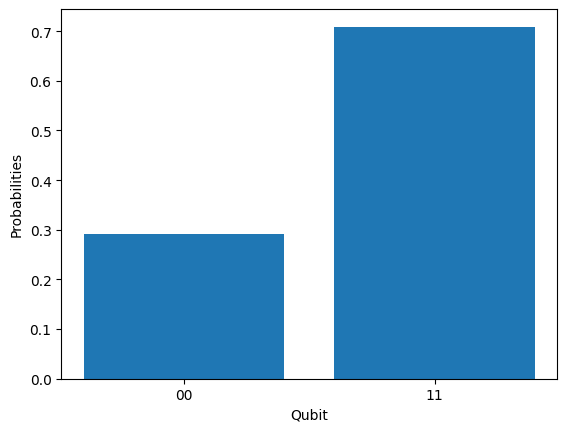

In [12]:
# display a bar-graph
x = np.array(qubits)
y = np.array(probabilities)
plt.bar(x,y)
plt.xlabel("Qubit")
plt.ylabel("Probabilities")
plt.show()

## 5.5. Post-Processing
It seems like we have two results. But if we look at $|\psi'\rangle$, we know it is $\sqrt{0.3}|0\rangle$. Moreover, the control qubit must return to its initial value which is 0. So we choose `00` as our solution and discard anything else.

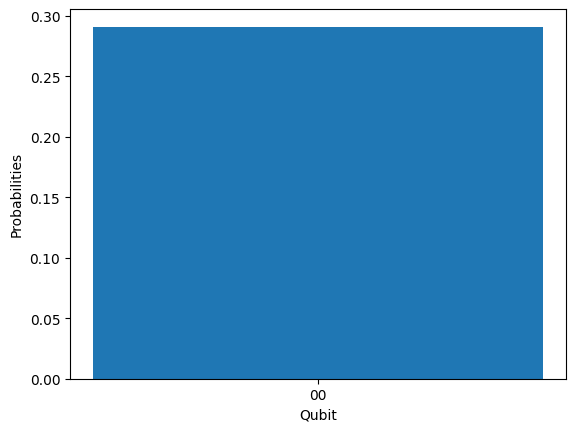

In [13]:
# display a bar-graph
x = np.array(qubits[0])
y = np.array(probabilities[0])
plt.bar(x,y)
plt.xlabel("Qubit")
plt.ylabel("Probabilities")
plt.show()

## 6. Conclusion
### Expectation
The control qubit is initiated as 0, goes through some transformations, and returns back to `0` because of the <b>PREPARE</b> and <b>PREPARE'</b> circuits. The final target qubit $|\psi'\rangle$ should be `0` according to above calculations.
### Outcome
From our bar-graph, we know that we get `00` with 30% probability for executions. This is consistent with our mathematical evaluation. The value `00` is also what we expect for the control and target qubits. Therefore, we can conclude that our output is what we expected. We have successfully implemented a non-unitary matrix $A$.